## Import libraries

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

## Import data

In [10]:
# Link
link = r'E:\datasets\car\all_anonymized_2015_11_2017_03.csv'

# Preview
df = pd.read_csv(link)
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


## Summary

In [11]:
# Shape
df.shape

(3552912, 16)

In [12]:
# Missing values
df.isna().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [13]:
# Drop color_slug for having too many missing values
df.drop('color_slug', axis=1, inplace=True)

# Model

`model` can be considered a lower-level feature to `maker`. There is no row with a non null `model` value and a null `maker` value.

In [14]:
# Count of rows when maker is null but model is not is 0
df.loc[df['maker'].isna(), 'model'].notna().sum()

0

In [15]:
# Unique maker
df['maker'].unique()

array(['ford', 'skoda', 'bmw', nan, 'suzuki', 'nissan', 'opel', 'citroen',
       'seat', 'kia', 'audi', 'rover', 'toyota', 'hyundai', 'fiat',
       'volvo', 'chevrolet', 'mazda', 'jeep', 'mercedes-benz', 'subaru',
       'chrysler', 'lancia', 'smart', 'honda', 'porsche', 'dodge',
       'mitsubishi', 'mini', 'jaguar', 'lexus', 'hummer', 'bentley',
       'tesla', 'maserati', 'isuzu', 'lamborghini', 'lotus', 'volkswagen',
       'peugeot', 'renault', 'alfa-romeo', 'infinity', 'rolls-royce',
       'aston-martin', 'land-rover', 'dacia'], dtype=object)

In [16]:
# Count of unique models for each maker
df.groupby('maker')['model'].nunique().sort_values(ascending=False)

maker
mercedes-benz    145
bmw              124
ford              54
nissan            47
toyota            43
audi              42
chevrolet         42
fiat              40
skoda             39
citroen           37
peugeot           33
opel              33
renault           31
volvo             30
volkswagen        29
lexus             29
hyundai           28
mazda             26
suzuki            23
honda             23
chrysler          22
infinity          22
kia               20
dodge             20
rover             19
alfa-romeo        18
mitsubishi        17
seat              16
subaru            15
jaguar            13
porsche           11
jeep              10
lancia             9
bentley            9
land-rover         7
mini               7
maserati           6
dacia              6
aston-martin       4
smart              4
tesla              3
hummer             3
rolls-royce        3
lotus              2
lamborghini        2
isuzu              2
Name: model, dtype: int64

In [17]:
# Count of different makers for each model
model_counts = df.groupby('model')['maker'].nunique().sort_values(ascending=False)
model_counts

model
octavia           8
passat            6
200               6
golf              5
grand-cherokee    4
                 ..
croma             1
crosswagon-q4     1
crown-victoria    1
cruze             1
zx                1
Name: maker, Length: 1012, dtype: int64

In [18]:
# Filter out values more than 2 (to fix outliers)
model_counts = model_counts[model_counts>1]
model_counts

model
octavia               8
passat                6
200                   6
golf                  5
grand-cherokee        4
                     ..
kangoo                2
range-rover-evoque    2
126                   2
range-rover-sport     2
rapid                 2
Name: maker, Length: 109, dtype: int64

In [19]:
# Outlier example: model = 'rapid'
df.loc[df['model'] == 'rapid', 'maker'].value_counts()

skoda      12115
hyundai        1
Name: maker, dtype: int64

<b> Fix outliers : </b> we check the proportion of the most frequent model. If the model has the maximum maker with frequency over 95%, we update all of the other makers to that one.

In [20]:
def model_frequency(df):
    model = df['model'].values[0]
    counts = df['maker'].value_counts()
    perc = counts[0] / counts.sum() * 100
    return pd.DataFrame({'agg1': [counts.index[0]], 'agg2': [perc]})

agg_df = df.groupby('model').apply(lambda x: model_frequency(x))
agg_df = agg_df.reset_index().drop('level_1', axis=1)
agg_df.columns = ['Model', 'Most frequent maker', 'Frequency']
agg_df.head()

,Model,Most frequent maker,Frequency
0,100,audi,94.010614
1,100-nx,nissan,100.000000
2,1007,peugeot,100.000000
3,105,skoda,100.000000
4,106,peugeot,99.949213


In [21]:
# Filter agg_df (frequency > 0.95). Get dictionary
agg_df = agg_df.loc[agg_df['Frequency'] >= 95, ['Model', 'Most frequent maker']]
dct = agg_df.set_index('Model')['Most frequent maker'].to_dict()

# Update
df.loc[df['model'].isin(dct.keys()), 'maker'] = df.loc[df['model'].isin(dct.keys()),'model'].map(dct)

In [22]:
# Recheck
model_counts = df.groupby('model')['maker'].nunique().sort_values( ascending=False)
model_counts[model_counts > 1]

model
200                   6
voyager               4
coupe                 4
100                   3
600                   3
gt                    3
defender              2
neon                  2
850                   2
400                   2
freelander            2
es                    2
126                   2
intrepid              2
discovery             2
discovery-sport       2
range-rover           2
range-rover-evoque    2
range-rover-sport     2
stratus               2
cx                    2
Name: maker, dtype: int64

# Manufacture year

<BarContainer object of 27 artists>

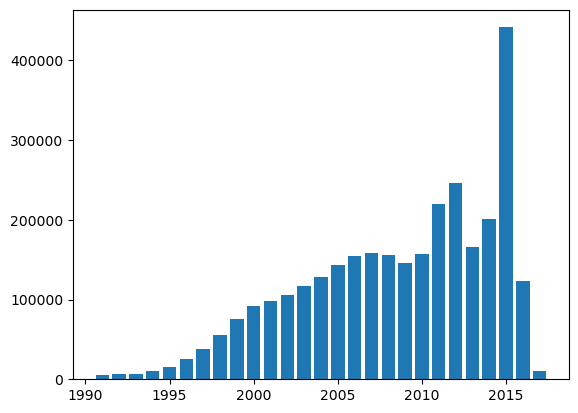

In [23]:
# Distribution
cutoff_year = 1990

counts = df['manufacture_year'].value_counts().sort_index()
filter_counts = counts[counts.index > cutoff_year]

plt.bar(filter_counts.index, filter_counts)

<b> Fix outliers : </b>
1. We filter out values with manufacture year less than 1960
2. We calculate median and std of each maker-model pair
3. We estimate the first_manufacture_year to be (median - std * 1.5) 

In [24]:
# Get median and std of each maker-mode pair
maker_model_df = df.dropna(subset = ['maker', 'model'])
maker_model_df = maker_model_df[maker_model_df['manufacture_year'] >= cutoff_year]
maker_model_agg = maker_model_df.groupby(['maker', 'model'], as_index=False)['manufacture_year'].agg({'median' : np.median, 'std' : np.std})
maker_model_agg = maker_model_agg.fillna(0)
maker_model_agg.head()

,maker,model,median,std
0,alfa-romeo,145,1999.0,4.866797
1,alfa-romeo,146,2000.0,4.051587
2,alfa-romeo,147,2004.0,2.717781
3,alfa-romeo,155,1996.5,2.629956
4,alfa-romeo,156,2002.0,3.272549


In [25]:
# Estimate first manufacture year
maker_model_agg['first_manufacture_year'] = (maker_model_agg['median'] - maker_model_agg['std'] * 1.5).astype('int32')
maker_model_agg.head()

,maker,model,median,std,first_manufacture_year
0,alfa-romeo,145,1999.0,4.866797,1991
1,alfa-romeo,146,2000.0,4.051587,1993
2,alfa-romeo,147,2004.0,2.717781,1999
3,alfa-romeo,155,1996.5,2.629956,1992
4,alfa-romeo,156,2002.0,3.272549,1997


In [26]:
# Merged to the orginal data
merged_df = df.merge(maker_model_agg[['maker', 'model', 'median', 'first_manufacture_year']], how='left', on = ['maker', 'model'] )
merged_df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,median,first_manufacture_year
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75,2005.0,1997.0
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31,2008.0,2000.0
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06,NaN,NaN
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77,2007.0,1999.0
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71,2007.0,1999.0


In [27]:
# Update
merged_df.loc[~merged_df['first_manufacture_year'].isna(), 'manufacture_year'] = merged_df.loc[~merged_df['first_manufacture_year'].isna(), ['manufacture_year', 'first_manufacture_year', 'median']].apply(lambda x: x['median'] if x['manufacture_year'] <= x['first_manufacture_year']  else x['manufacture_year'], axis=1)
df = merged_df.drop(['first_manufacture_year', 'median'], axis=1)

df.loc[df['manufacture_year'] < cutoff_year ,'manufacture_year'] = np.nan

<BarContainer object of 43 artists>

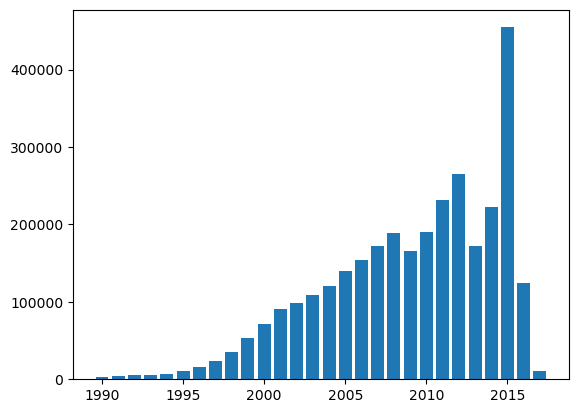

In [28]:
# New distribution
counts = df['manufacture_year'].value_counts().sort_index()
plt.bar(counts.index, counts)

# Mileage

In [29]:
# Cutoff mileage:
cutoff_mileage = 400000
df['mileage'][df['mileage']<cutoff_mileage].shape[0] / df['mileage'].dropna().shape[0]

0.9925636470835326

(array([1099483.,  411669.,  447427.,  428286.,  358207.,  205788.,
         108477.,   49596.,   19925.,    9128.]),
 array([     0. ,  39999.9,  79999.8, 119999.7, 159999.6, 199999.5,
        239999.4, 279999.3, 319999.2, 359999.1, 399999. ]),
 <BarContainer object of 10 artists>)

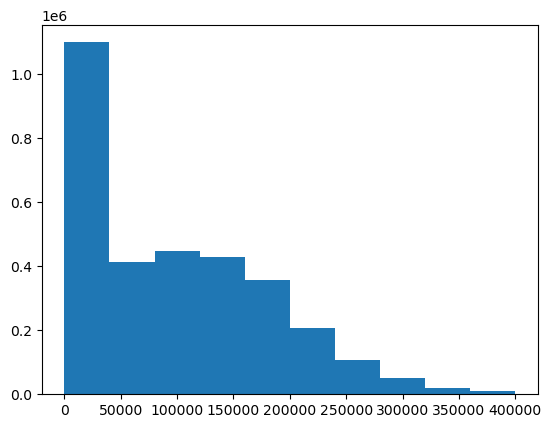

In [30]:
# Distribution
plt.hist(df['mileage'][df['mileage']<cutoff_mileage])

In [31]:
# Update
df.loc[df['mileage'] < cutoff_mileage ,'mileage'] = np.nan

# Price

In [32]:
# Outlier: 1295.34
df['price_eur'].value_counts()

1295.34     659235
9900.00       6482
10900.00      6476
12900.00      6220
11900.00      6141
             ...  
16767.88         1
19166.14         1
9472.06          1
29771.61         1
24294.71         1
Name: price_eur, Length: 225983, dtype: int64

In [33]:
# Update
df = df[df['price_eur'] != 1295.34]

In [34]:
# Cutoff price = 100000
cutoff_price = 100000
df = df[df['price_eur'] <= cutoff_price]

<Axes: >

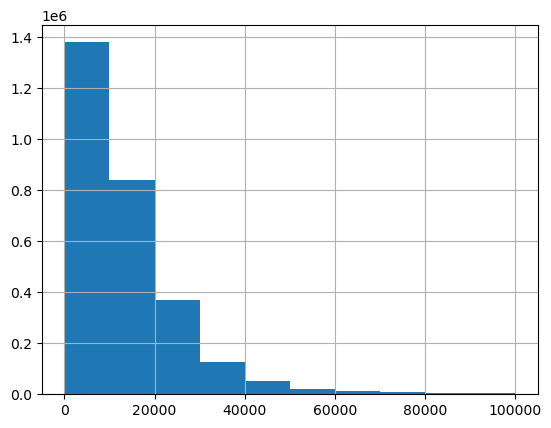

In [35]:
df['price_eur'].hist()